<a href="https://colab.research.google.com/github/mubashira18/Mini-Project/blob/main/IMAGE_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Heyy guys*
**MY SELF MUBASHIRA THIS IS MY FIRST MACHINE LEARNING MODEL **
1.   Here is the code of my model
2.   I removed almost all outputs which causes irritation to the reader
3.   I still didn't removed some of them so that one can know what's going through the code 
                  *LET'S TALK ABOUT THE MAIN THING*
1.I used bing  image downloader to download my data.
2.Then i flattened my data so that it will be more convenient.
3.Preposed my data this is **CRUCIAL STEP**.
4.Resized and reshaped using **SCIKIT-IMAGE** library.
5.splitted my data to train and test my data.
6.Applied **SVM** with parameters **C**,**KERNAL**,**GAMMA** using grid search cv.
7.Then predicted accuracy  SCORE,USED **CONFUSION MATRIX** to compare my predicted and tested data.
8.Used pickel library ti store my data in a file.
8.Used streamlit andpyngrok to deploy my model.


      **HERE I TRAINED THE MACHINE TO CLASSIFY THREE TYPES OF IMAGES** :

1.      **jack in titanic**
2.       **itachi uchiha**
3.       **emma stone**
 and the machine predicted correctly.
 ***hope u enjoy my model***
 





In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
!pip install bing-image-downloader

time: 2.63 s (started: 2021-06-15 02:25:41 +00:00)


In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 121 ms (started: 2021-06-15 02:25:45 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("jack in titanic",limit=30,output_dir='images',
                    adult_filter_off=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download("emma stone",limit=30,output_dir='images',
                    adult_filter_off=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download("itachi uchiha",limit=30,output_dir='images',
                    adult_filter_off=True)

In [ ]:
import numpy as np

a = np.array([[1,2,3,4,5],
              [4,5,6,7,8]])
a.ndim

2

time: 17 ms (started: 2021-06-15 02:27:06 +00:00)


In [ ]:
#converting 2d into 1d that is matrix to vectro by faltten() method
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 6.52 ms (started: 2021-06-15 02:27:09 +00:00)


In [ ]:
#preprocessing
#1.resize
#2.flatten
import os #to acess lot of folders  
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread #for reading an images
from skimage.transform import resize #for resizing images in one specific size

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['jack in titanic','emma stone','itachi uchiha']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)#create path to use all the meters
  for img in os.listdir(path):
   img_array = imread(os.path.join(path,img))
   img_resized = resize(img_array,(150,150,3))#imp step,normalizes value from 0 to 1
   flat_data.append(img_resized.flatten())#imp step
   images.append(img_resized)
   target.append(class_num)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 27.4 s (started: 2021-06-15 02:32:26 +00:00)


In [ ]:
flat_data[0]

array([0.09898039, 0.01270588, 0.00878431, ..., 0.02839216, 0.01662745,
       0.01270588])

time: 7.27 ms (started: 2021-06-15 02:33:01 +00:00)


In [ ]:
len(flat_data[0])

67500

time: 5.48 ms (started: 2021-06-15 02:33:04 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 5.44 ms (started: 2021-06-15 02:33:06 +00:00)


<BarContainer object of 3 artists>

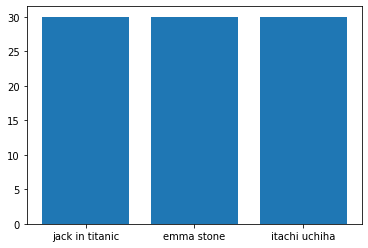

time: 135 ms (started: 2021-06-15 02:33:08 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
#spliting data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 19 ms (started: 2021-06-15 02:33:10 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}          
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 52s (started: 2021-06-15 02:33:13 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2,
       1, 0, 0, 0, 2])

time: 176 ms (started: 2021-06-15 02:35:09 +00:00)


In [ ]:
y_test


array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 6.94 ms (started: 2021-06-15 02:35:12 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 887 µs (started: 2021-06-15 02:35:14 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.6666666666666666

time: 5.25 ms (started: 2021-06-15 02:35:16 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[6, 2, 2],
       [1, 7, 1],
       [1, 2, 5]])

time: 3.99 ms (started: 2021-06-15 02:35:17 +00:00)


In [ ]:
 #saving the model using pickle library
 import pickle
 pickle.dump(clf,open('img_model.p','wb'))

time: 46.3 ms (started: 2021-06-15 02:35:21 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 20.3 ms (started: 2021-06-15 02:35:24 +00:00)


enter your URLhttps://i.pinimg.com/564x/8a/1a/83/8a1a83b5e134b26bb5033083068bd246.jpg
(675, 540, 3)
PREDICTED OUTPUT:jack in titanic


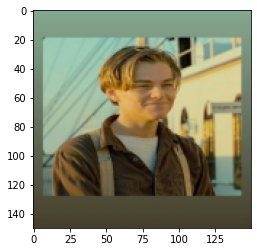

time: 4.66 s (started: 2021-06-15 02:35:27 +00:00)


In [ ]:
#testing a brand new image
flat_data = []
url = input('enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

enter your URLhttps://i.pinimg.com/originals/41/db/50/41db500550cfdbe32c47e088d2d9e9ee.jpg
(900, 1200, 3)
PREDICTED OUTPUT:itachi uchiha


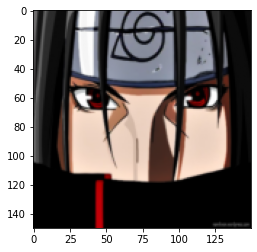

time: 5.56 s (started: 2021-06-15 02:38:47 +00:00)


In [ ]:
#testing a brand new image
flat_data = []
url = input('enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

enter your URLhttps://stylecaster.com/wp-content/uploads/2018/10/emma-stone.jpg
(1080, 1920, 3)
PREDICTED OUTPUT:emma stone


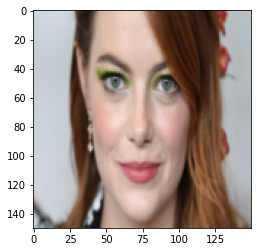

time: 5.13 s (started: 2021-06-15 02:40:49 +00:00)


In [ ]:
#testing a brand new image
flat_data = []
url = input('enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

In [ ]:
!pip install streamlit
!pip install pyngrok


In [ ]:
%%writefile min.py
import streamlit as st
import numpy as np
from skimage.io import imread
fron skimage.transform import resize 
import pickle
import PIL import Image
st.title("mini project")
st.subheader('IMAGE CLASSIFIER')
st.write('done by me')
st.text('upload image')
model = pickel.load(open('img_model.p','rb'))
uploaded_file = st.file_uploader("choose an image...",type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')
if st.button('PREDICT'):  
  st.write('Result...')
  flat_data=[]
  img = np.array(img)
  img_resized = resize(img,(150,150,3))
  flat_data.append(img_resized.flatten())
  flat_data = np.array(flat_data)
  print(img.shape)
  plt.imshow(img_resized)
  y_out = model.predict(flat_data)
  y_out = CATEGORIES[y_out[0]]
  st.title(f'PREDICTED OUTPUT:{y_out}')
  q = model.predict_proba(flat_data)
  for index,item in enumerate(CATEGORIES):
    st.write(f'{item} : {q[0][index]*100')

Writing min.py


In [ ]:
from pyngrok import ngrok

In [ ]:
public_url = ngrok.connect(port='8501')
public_url

2021-06-15 03:47:50.263 INFO    pyngrok.ngrok: Opening tunnel named: http-80-f8acf5f7-540c-4896-8cc6-b0ea44c90ef5
2021-06-15 03:47:50.300 INFO    pyngrok.process.ngrok: t=2021-06-15T03:47:50+0000 lvl=info msg="no configuration paths supplied"
2021-06-15 03:47:50.303 INFO    pyngrok.process.ngrok: t=2021-06-15T03:47:50+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-06-15 03:47:50.307 INFO    pyngrok.process.ngrok: t=2021-06-15T03:47:50+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-06-15 03:47:50.316 INFO    pyngrok.process.ngrok: t=2021-06-15T03:47:50+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-06-15 03:47:50.568 INFO    pyngrok.process.ngrok: t=2021-06-15T03:47:50+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-06-15 03:47:50.570 INFO    pyngrok.process.ngrok: t=2021-06-15T03:47:50+0000 lvl=info msg="client session established" obj=csess id=263c9e911647
2

<NgrokTunnel: "http://a96fff78771e.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run min.py &>/dev/null



> hope you guys liked my model
>thank you for reading it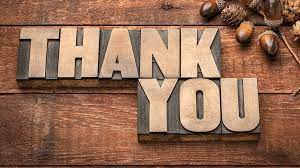

